# Curve fitting experimental data

Curve fitting data is a standard practice in creating physical models of observed phenomena. When an expected model form exists, we use that form and fit it the best we can. If there is too much error for our needs, we may ignore the physical model for the sake of expedience. If we have no physics-based model we are free to use what ever seems to work the best. Often  the solution presented is to plot data, pick two points, then get a line from that. Picking two points "works", but it's crass and defeats the point of collecting that much data. A much better way is to transform the data using log functions, find your parameters, and transform them appropriately from `log space`.

# Fitting a line

Let's start with a refresher for curve fitting $y=mx+b$. Our derivation led us to two equations and two unknowns. You may use those. With a modern computer (under 35 years old), the faster way is to do this with linear algebra. With Matlab, `polyfit` will do this for you. I will use this later. 

With linear algebra, we write the equations such that:

$$y_i = m x_i + b$$

Putting a bunch of these together, I can write them in matrix form as

$$\begin{bmatrix}
y_1\\
y_2\\
y_3\\
y_4\\
\vdots
\end{bmatrix}
=
\begin{bmatrix}
x_1& 1\\
x_2& 1\\
x_3& 1\\
x_4& 1\\
\vdots&\vdots\\
\end{bmatrix}
\begin{bmatrix}
m\\
b\end{bmatrix}
$$
which for compactness we write as
$$Y = X B$$

Because $X$ is not square, we can instead pre-multiply by $X^T$ so that the matrix preceding $B$ is now square (specifically, for a line it is now a $2\times 2$ matrix).

$$X^TY=X^TXB$$

Pre-multiplying both sides by $(X^TX)^{-1}$ we have

$$(X^TX)^{-1}X^TY=B$$

The elements of $B$ are $m$ and $b$. In Matlab, this would look something like

```
>> Y = [1;2;3;4]
Y =
   1
   2
   3
   4
>> x = [4;3;2;1]
x =
   4
   3
   2
   1
>> X = [x*0+1, x]
X =
   1   4
   1   3
   1   2
   1   1
>> B = (X'*X)\X'*Y
B =
   5
  -1
```

which means a $y$ intercept of $5$ an a slope of $1$. 

We could alternatively have used `polyfit` like this:

```
>> B = polyfit(x, Y,1)
B =
  -1.0000   5.0000
```

While this is certainly simpler, and **allowed for the course** it is limited in its flexibility compared to the detailed method which would allow you to fit a 2-D surface instead of just a line. 

To curve fit a parabola, you follow the same procedure as above, but starting with $y = a x^2 + b x + c$, or you use `polyfit` with the last parameter set to $2$. 

## Other forms

### Power function

I covered how to do this in class when you want a model of the form $y=bx^m$. 

Let's refresh:

Start by taking the natural log of the equation. This yields

$$\ln(y)=\ln(b)+m \ln(x)$$ 

For simplicity, you could define $\ln(y)=Y$, $\ln(x)=X$, and $\ln(b)=B$ so that the equation is  

$$Y = m X + B$$

The is the equation of a line. If you use the log of the data $x$ and $y$, and curve fit like you would a line, you obtain $m$ and $\ln(b)$. Since $b=e^{B}=e^{\ln(b)}$, if you can fit a line, you can get the parameters $b$ and $m$ for the model $y=bx^m$.

### Exponential function

Let's start by presuming a model of the form 

$$y = b e^{mx}$$

Start by taking the natural log of the equation. This yields

$$\ln(y)=\ln(b)+m x$$ 

For simplicity, you could define $\ln(y)=Y$ and $\ln(b)=B$ so that the equation is  

$$Y = m x + B$$

The is the equation of a line. If you use the $\ln$ of the data $y$, and curve fit like you would a line, you obtain $m$ and $\ln(b)$. Since $b=e^{B}=e^{\ln(b)}$, if you can fit a line, you can get the parameters $b$ and $m$ for the model $y=be^{xm}$.

In Matlab, this would look like

```
x = (0:10)'
y =[3.0138902;
   1.8036854;
   1.0875830;
   0.6749870;
   0.4167889;
   0.2215530;
   0.1667404;
   0.0906666;
   0.0593329;
   0.0275748;
   0.0046658]
>> B = polyfit(x, Y, 1)
B =
  -0.57030   1.30850
>>> b = exp(B(2))
b =  3.7006
```

Here, $1.30850$ is not the $y$ intercept but instead is the $\ln$ of the coefficient to the exponential (still called $b$). So the equation is 

$$y(x) = 3.7006 e^{(-0.57030 x)}$$


Most students in engineering schools seem to be using Matlab, so I have presented the code above in that form. I prefer Python. My blog already covers why so I won't repeat that. For this purpose, it is simply easier for me to generate the plot of the results in python. You can read or ignore the code at your discretion. 

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [11]:
x = np.linspace(0,10,11)
y = np.array([3.0138902, 1.8036854, 1.0875830, 0.6749870, 0.4167889, 0.2215530, 0.1667404, 0.0906666, 0.0593329, 0.0275748, 0.0046658])

In [13]:
np.polyfit(x,np.log(y), 1)

array([-0.5703016 ,  1.30849592])

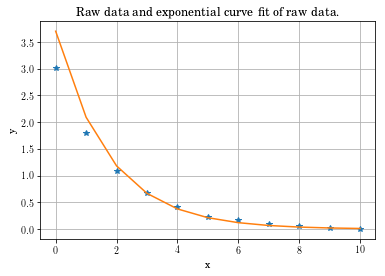

In [17]:
plt.plot(x, y, '*', x, np.exp(1.30849592)*np.exp(-0.5703016*x))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Raw data and exponential curve fit of raw data.')
plt.grid()